In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt

In [2]:
data_path = "Data/dataset.csv"
df = pd.read_csv(data_path)
df.head()

,recipe_name,recipe_id,minutes,submission_date,nutrition,n_steps,ingredients,n_ingredients,rating_dates,ratings,n_ratings,cuisine_tags,vegan,vegetarian
0,arriba baked winter squash mexican style,137739,55,2005-09-16,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,"['2006-02-18', '2010-08-21', '2011-12-05']","[5, 5, 5]",3,"['north-american', 'mexican']",False,True
1,a bit different breakfast pizza,31490,30,2002-06-17,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,"['2002-08-19', '2006-08-27', '2009-07-18', '20...","[0, 5, 4, 5]",4,"['north-american', 'american']",False,False
2,amish tomato ketchup for canning,44061,190,2002-10-25,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8,['2011-08-21'],[5],1,"['north-american', 'american']",False,True
3,apple a day milk shake,5289,0,1999-12-06,"[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['milk', 'vanilla ice cream', 'frozen apple ju...",4,"['2002-07-23', '2007-05-10']","[5, 5]",2,"['north-american', 'american']",False,False
4,aww marinated olives,25274,15,2002-04-14,"[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,"['fennel seeds', 'green olives', 'ripe olives'...",9,['2005-02-26'],[2],1,"['north-american', 'canadian']",True,True


In [3]:
df['year'] = df['submission_date'].str[:4].astype(int)
df['year']

0        2005
1        2002
2        2002
3        1999
4        2002
         ... 
90464    2011
90465    2003
90466    2010
90467    2009
90468    2012
Name: year, Length: 90469, dtype: int64

# Preprocess - Counting the popularity

In [4]:
def str_to_list(s):
    try:
        return literal_eval(s)
    except ValueError:
        return []

In [5]:
df['cuisine_tags'] = df['cuisine_tags'].apply(str_to_list)
df['cuisine_tags']

0                                [north-american, mexican]
1                               [north-american, american]
2                               [north-american, american]
3                               [north-american, american]
4                               [north-american, canadian]
                               ...                        
90464                                    [european, swiss]
90465                                   [german, european]
90466                                    [european, swiss]
90467    [north-american, american, southern-united-sta...
90468    [north-american, american, southern-united-sta...
Name: cuisine_tags, Length: 90469, dtype: object

In [6]:
recipe_count_dict = {}

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    cuisines = row['cuisine_tags']
    year = row['year']

    # Iterate through each cuisine in the list
    for cuisine in cuisines:
        # If the cuisine is not in the dictionary, add it with an empty dictionary
        if cuisine not in recipe_count_dict:
            recipe_count_dict[cuisine] = {}

        # If the year is not in the inner dictionary, add it with a count of 1
        if year not in recipe_count_dict[cuisine]:
            recipe_count_dict[cuisine][year] = 1
        else:
            # If the year is already in the inner dictionary, increment the count
            recipe_count_dict[cuisine][year] += 1

# Iterate through all cuisines and years to ensure every combination is present
all_cuisines = set(df['cuisine_tags'].explode())
all_years = set(df['year'])

for cuisine in all_cuisines:
    if cuisine not in recipe_count_dict:
        recipe_count_dict[cuisine] = {}
    for year in all_years:
        if year not in recipe_count_dict[cuisine]:
            recipe_count_dict[cuisine][year] = 0

print(recipe_count_dict)

{'north-american': {2005: 5163, 2002: 7112, 1999: 553, 2003: 3906, 2001: 1860, 2004: 2881, 2011: 1472, 2008: 4798, 2013: 1006, 2007: 6357, 2010: 1695, 2006: 5889, 2014: 219, 2009: 4232, 2012: 1125, 2000: 168, 2018: 7, 2015: 18, 2017: 7, 2016: 11}, 'mexican': {2005: 797, 2003: 491, 2002: 645, 2013: 97, 2006: 849, 2008: 679, 2009: 595, 2010: 253, 2007: 1017, 2004: 460, 2011: 243, 2001: 170, 2000: 57, 2012: 205, 2015: 20, 2014: 46, 1999: 45, 2016: 4, 2018: 10, 2017: 11}, 'american': {2002: 5231, 1999: 490, 2003: 2648, 2001: 1379, 2004: 1651, 2008: 2886, 2005: 2952, 2013: 683, 2007: 3890, 2010: 1137, 2006: 3575, 2011: 1104, 2014: 166, 2009: 2414, 2012: 842, 2000: 106, 2018: 6, 2015: 10, 2017: 4, 2016: 5}, 'canadian': {2002: 1201, 2011: 75, 2004: 289, 2009: 209, 2006: 431, 2001: 499, 2008: 388, 2005: 524, 2003: 431, 2007: 337, 2012: 53, 2000: 2, 2010: 69, 2013: 33, 1999: 9, 2014: 18, 2016: 1, 2015: 2, 2017: 1, 2018: 0}, 'hawaiian': {2003: 40, 2006: 49, 2005: 46, 2007: 38, 2002: 90, 2008: 44

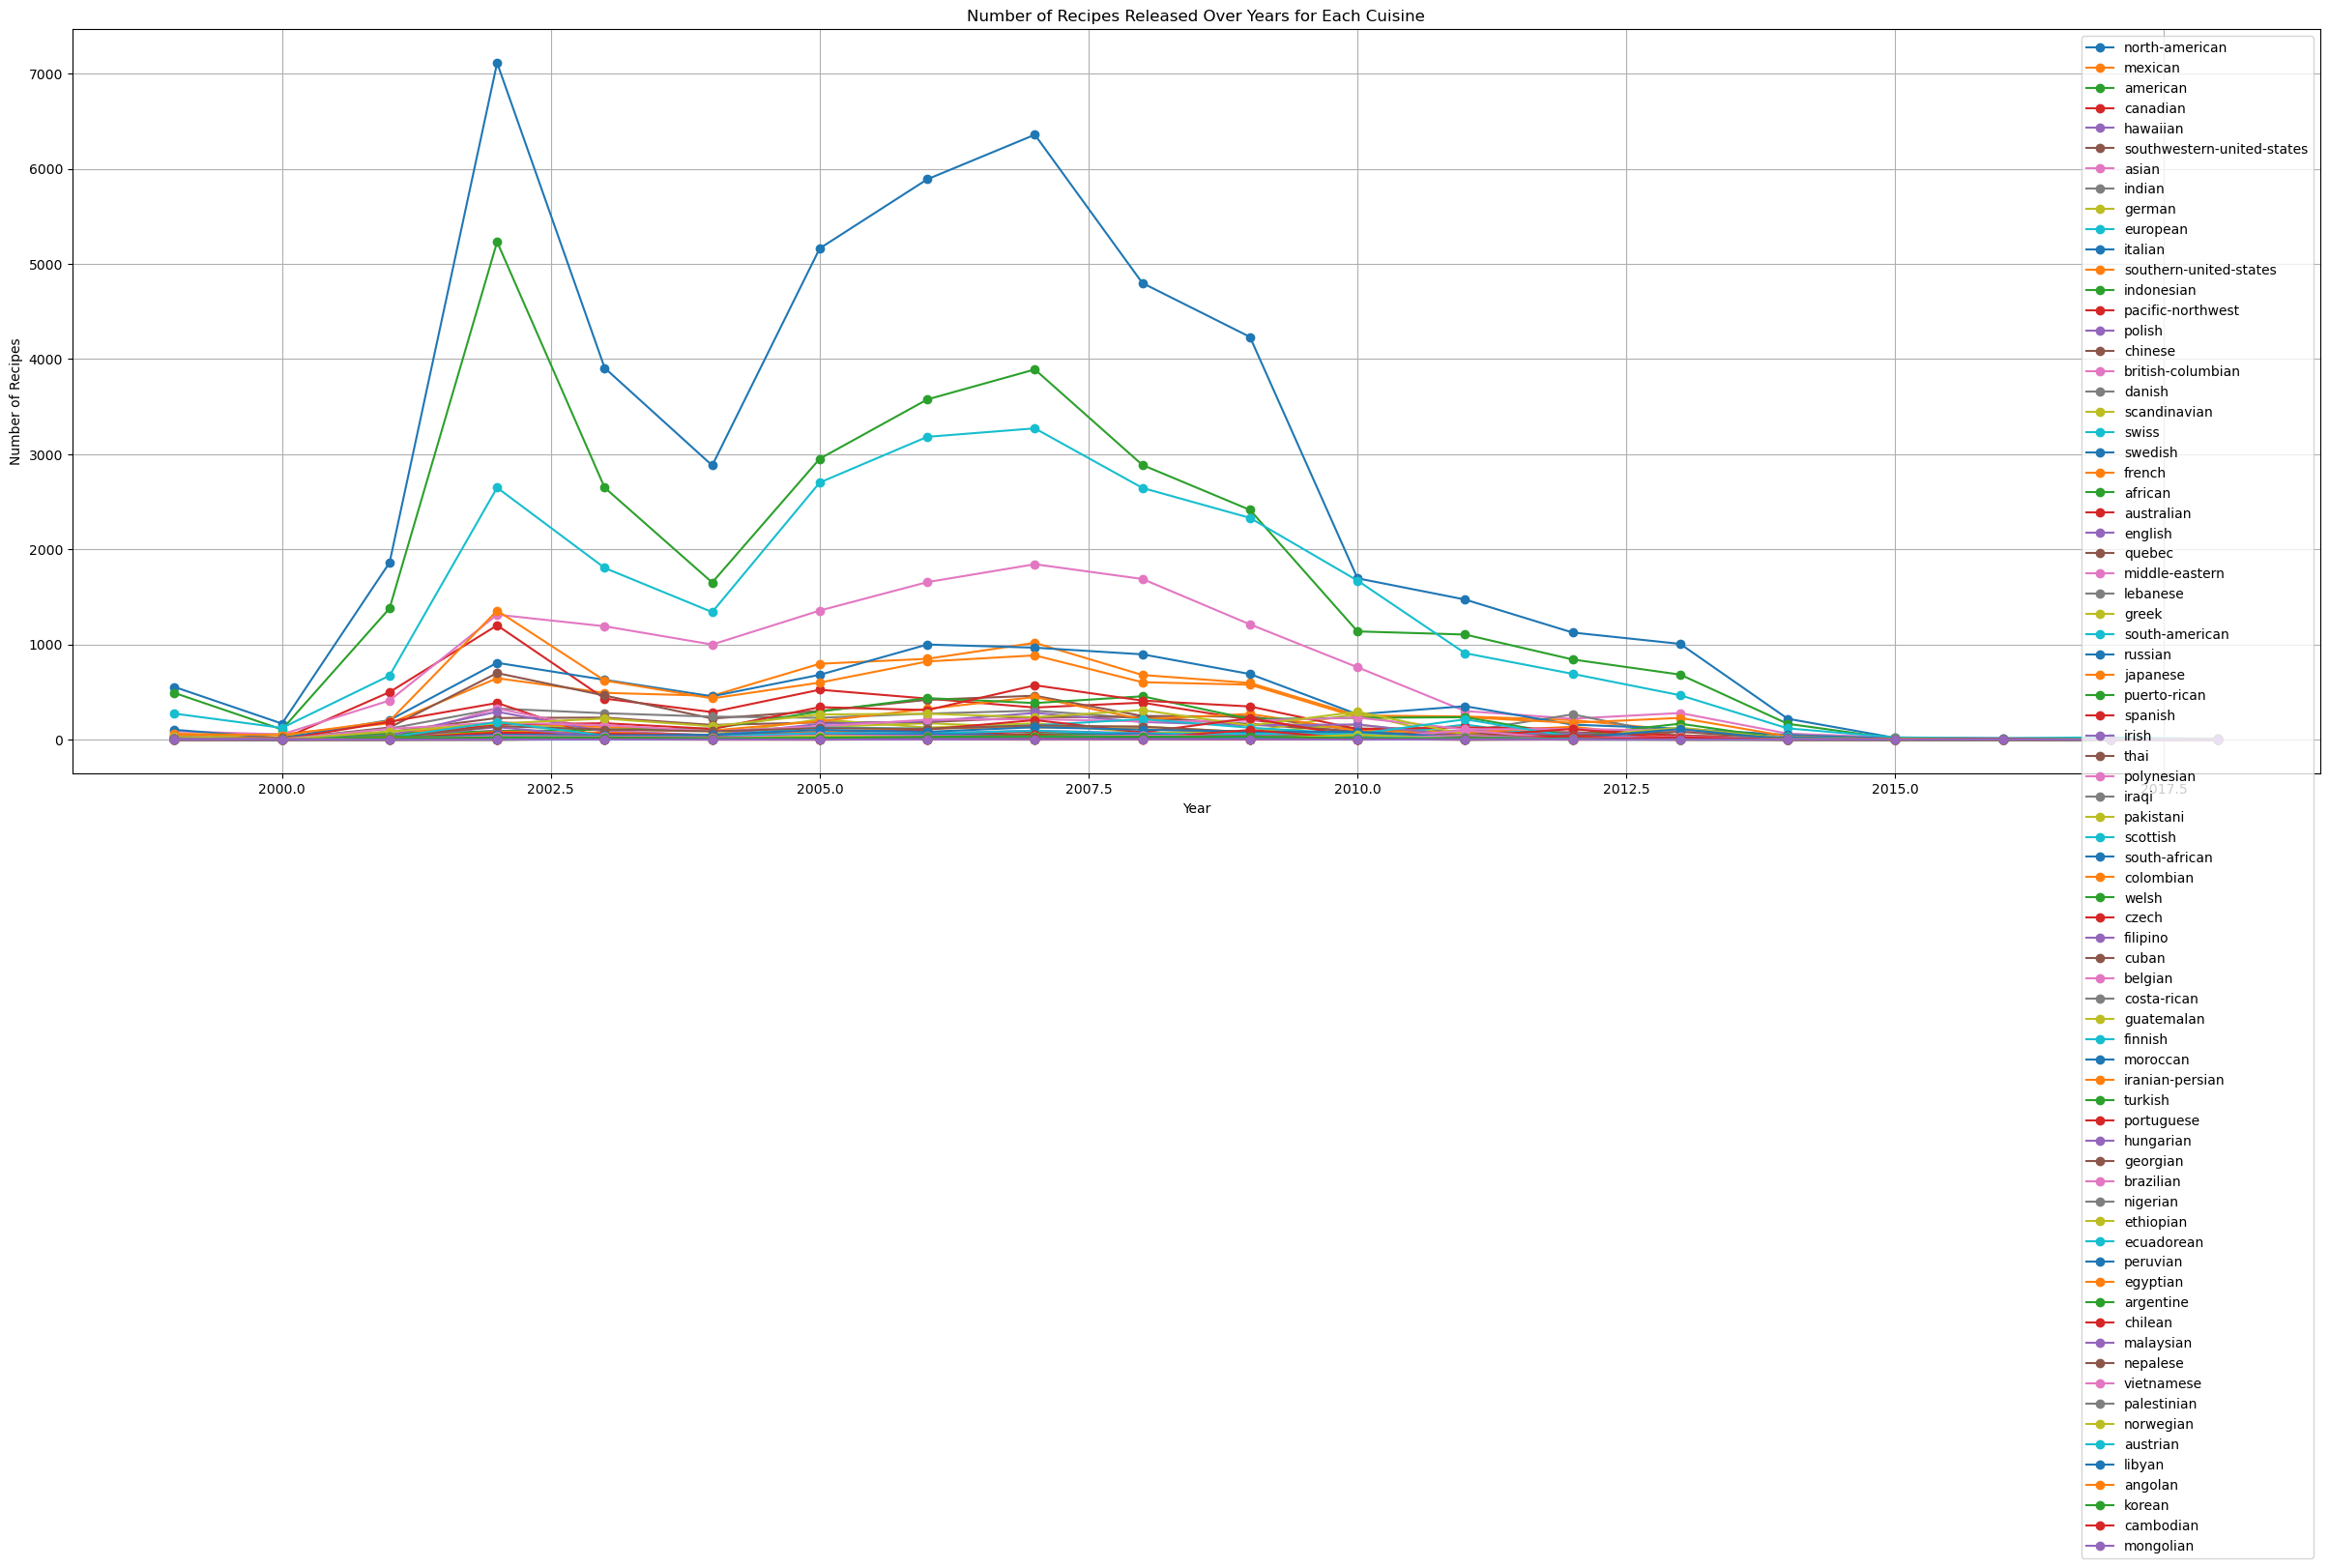

In [7]:
plot_data = pd.DataFrame(recipe_count_dict)
plot_data = plot_data.sort_index()
# Plotting
plt.figure(figsize=(30, 10))
for cuisine in plot_data.columns:
    plt.plot(plot_data.index, plot_data[cuisine], label=cuisine, marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes Released Over Years for Each Cuisine')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
plot_data

,north-american,mexican,american,canadian,hawaiian,southwestern-united-states,asian,indian,german,european,...,nepalese,vietnamese,palestinian,norwegian,austrian,libyan,angolan,korean,cambodian,mongolian
1999,553,45,490,9,2,23,87,16,16,273,...,0,2,0,1,1,0,0,1,0,0
2000,168,57,106,2,1,5,55,12,54,123,...,0,4,0,1,0,0,0,0,0,0
2001,1860,170,1379,499,9,127,411,115,37,672,...,0,1,0,3,2,0,0,10,0,0
2002,7112,645,5231,1201,90,699,1313,326,180,2648,...,1,36,0,5,14,0,0,24,1,0
2003,3906,491,2648,431,40,463,1191,277,108,1804,...,1,30,4,13,10,5,2,23,2,1
2004,2881,460,1651,289,28,221,999,241,86,1340,...,27,21,10,6,4,4,0,14,0,0
2005,5163,797,2952,524,46,301,1356,229,132,2702,...,5,44,8,36,13,8,0,19,0,0
2006,5889,849,3575,431,49,418,1655,273,172,3182,...,1,36,14,23,19,3,1,29,4,1
2007,6357,1017,3890,337,38,461,1843,304,126,3271,...,3,32,14,29,25,4,0,36,6,2
2008,4798,679,2886,388,44,248,1688,223,138,2645,...,9,42,6,8,20,7,0,31,5,2


In [9]:
plot_data.index.name = 'year'
plot_data

,north-american,mexican,american,canadian,hawaiian,southwestern-united-states,asian,indian,german,european,...,nepalese,vietnamese,palestinian,norwegian,austrian,libyan,angolan,korean,cambodian,mongolian
year,,,,,,,,,,,,,,,,,,,,,
1999,553,45,490,9,2,23,87,16,16,273,...,0,2,0,1,1,0,0,1,0,0
2000,168,57,106,2,1,5,55,12,54,123,...,0,4,0,1,0,0,0,0,0,0
2001,1860,170,1379,499,9,127,411,115,37,672,...,0,1,0,3,2,0,0,10,0,0
2002,7112,645,5231,1201,90,699,1313,326,180,2648,...,1,36,0,5,14,0,0,24,1,0
2003,3906,491,2648,431,40,463,1191,277,108,1804,...,1,30,4,13,10,5,2,23,2,1
2004,2881,460,1651,289,28,221,999,241,86,1340,...,27,21,10,6,4,4,0,14,0,0
2005,5163,797,2952,524,46,301,1356,229,132,2702,...,5,44,8,36,13,8,0,19,0,0
2006,5889,849,3575,431,49,418,1655,273,172,3182,...,1,36,14,23,19,3,1,29,4,1
2007,6357,1017,3890,337,38,461,1843,304,126,3271,...,3,32,14,29,25,4,0,36,6,2


In [10]:
plot_data.columns

Index(['north-american', 'mexican', 'american', 'canadian', 'hawaiian',
       'southwestern-united-states', 'asian', 'indian', 'german', 'european',
       'italian', 'southern-united-states', 'indonesian', 'pacific-northwest',
       'polish', 'chinese', 'british-columbian', 'danish', 'scandinavian',
       'swiss', 'swedish', 'french', 'african', 'australian', 'english',
       'quebec', 'middle-eastern', 'lebanese', 'greek', 'south-american',
       'russian', 'japanese', 'puerto-rican', 'spanish', 'irish', 'thai',
       'polynesian', 'iraqi', 'pakistani', 'scottish', 'south-african',
       'colombian', 'welsh', 'czech', 'filipino', 'cuban', 'belgian',
       'costa-rican', 'guatemalan', 'finnish', 'moroccan', 'iranian-persian',
       'turkish', 'portuguese', 'hungarian', 'georgian', 'brazilian',
       'nigerian', 'ethiopian', 'ecuadorean', 'peruvian', 'egyptian',
       'argentine', 'chilean', 'malaysian', 'nepalese', 'vietnamese',
       'palestinian', 'norwegian', 'austrian'

In [11]:
plot_data.to_csv('./static/plot3/popularity.csv')

### normalization


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the DataFrame
plot_data_normalized = pd.DataFrame(scaler.fit_transform(plot_data), columns=plot_data.columns)

In [13]:
plot_data_normalized

,north-american,mexican,american,canadian,hawaiian,southwestern-united-states,asian,indian,german,european,...,nepalese,vietnamese,palestinian,norwegian,austrian,libyan,angolan,korean,cambodian,mongolian
0,0.076847,0.040474,0.092979,0.007494,0.022222,0.032904,0.044614,0.046154,0.088889,0.081776,...,0.000000,0.045455,0.000000,0.019608,0.04,0.000,0.000000,0.027778,0.000000,0.000000
1,0.022660,0.052320,0.019514,0.001665,0.011111,0.007153,0.027203,0.033846,0.300000,0.035835,...,0.000000,0.090909,0.000000,0.019608,0.00,0.000,0.000000,0.000000,0.000000,0.000000
2,0.260802,0.163870,0.263057,0.415487,0.100000,0.181688,0.220892,0.350769,0.205556,0.203982,...,0.000000,0.022727,0.000000,0.058824,0.08,0.000,0.000000,0.277778,0.000000,0.000000
3,1.000000,0.632774,1.000000,1.000000,1.000000,1.000000,0.711643,1.000000,1.000000,0.809188,...,0.037037,0.818182,0.000000,0.098039,0.56,0.000,0.000000,0.666667,0.041667,0.000000
4,0.548768,0.480750,0.505835,0.358868,0.444444,0.662375,0.645267,0.849231,0.600000,0.550689,...,0.037037,0.681818,0.235294,0.254902,0.40,0.625,0.333333,0.638889,0.083333,0.333333
5,0.404504,0.450148,0.315095,0.240633,0.311111,0.316166,0.540805,0.738462,0.477778,0.408576,...,1.000000,0.477273,0.588235,0.117647,0.16,0.500,0.000000,0.388889,0.000000,0.000000
6,0.725686,0.782823,0.563995,0.436303,0.511111,0.430615,0.735038,0.701538,0.733333,0.825727,...,0.185185,1.000000,0.470588,0.705882,0.52,1.000,0.000000,0.527778,0.000000,0.000000
7,0.827868,0.834156,0.683183,0.358868,0.544444,0.597997,0.897715,0.836923,0.955556,0.972741,...,0.037037,0.818182,0.823529,0.450980,0.76,0.375,0.166667,0.805556,0.166667,0.333333
8,0.893737,1.000000,0.743447,0.280600,0.422222,0.659514,1.000000,0.932308,0.700000,1.000000,...,0.111111,0.727273,0.823529,0.568627,1.00,0.500,0.000000,1.000000,0.250000,0.666667
9,0.674314,0.666338,0.551368,0.323064,0.488889,0.354793,0.915669,0.683077,0.766667,0.808270,...,0.333333,0.954545,0.352941,0.156863,0.80,0.875,0.000000,0.861111,0.208333,0.666667


In [14]:
plot_data_normalized = plot_data_normalized.round(2) * 100

In [15]:
plot_data_normalized['year'] = range(1999,2019)

In [16]:
plot_data_normalized = plot_data_normalized.set_index('year')

In [17]:
plot_data_normalized

,north-american,mexican,american,canadian,hawaiian,southwestern-united-states,asian,indian,german,european,...,nepalese,vietnamese,palestinian,norwegian,austrian,libyan,angolan,korean,cambodian,mongolian
year,,,,,,,,,,,,,,,,,,,,,
1999,8.0,4.0,9.0,1.0,2.0,3.0,4.0,5.0,9.0,8.0,...,0.0,5.0,0.0,2.0,4.0,0.0,0.0,3.0,0.0,0.0
2000,2.0,5.0,2.0,0.0,1.0,1.0,3.0,3.0,30.0,4.0,...,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,26.0,16.0,26.0,42.0,10.0,18.0,22.0,35.0,21.0,20.0,...,0.0,2.0,0.0,6.0,8.0,0.0,0.0,28.0,0.0,0.0
2002,100.0,63.0,100.0,100.0,100.0,100.0,71.0,100.0,100.0,81.0,...,4.0,82.0,0.0,10.0,56.0,0.0,0.0,67.0,4.0,0.0
2003,55.0,48.0,51.0,36.0,44.0,66.0,65.0,85.0,60.0,55.0,...,4.0,68.0,24.0,25.0,40.0,62.0,33.0,64.0,8.0,33.0
2004,40.0,45.0,32.0,24.0,31.0,32.0,54.0,74.0,48.0,41.0,...,100.0,48.0,59.0,12.0,16.0,50.0,0.0,39.0,0.0,0.0
2005,73.0,78.0,56.0,44.0,51.0,43.0,74.0,70.0,73.0,83.0,...,19.0,100.0,47.0,71.0,52.0,100.0,0.0,53.0,0.0,0.0
2006,83.0,83.0,68.0,36.0,54.0,60.0,90.0,84.0,96.0,97.0,...,4.0,82.0,82.0,45.0,76.0,38.0,17.0,81.0,17.0,33.0
2007,89.0,100.0,74.0,28.0,42.0,66.0,100.0,93.0,70.0,100.0,...,11.0,73.0,82.0,57.0,100.0,50.0,0.0,100.0,25.0,67.0


In [18]:
plot_data_normalized.columns = plot_data_normalized.columns.str.title()


In [19]:
plot_data_normalized

,North-American,Mexican,American,Canadian,Hawaiian,Southwestern-United-States,Asian,Indian,German,European,...,Nepalese,Vietnamese,Palestinian,Norwegian,Austrian,Libyan,Angolan,Korean,Cambodian,Mongolian
year,,,,,,,,,,,,,,,,,,,,,
1999,8.0,4.0,9.0,1.0,2.0,3.0,4.0,5.0,9.0,8.0,...,0.0,5.0,0.0,2.0,4.0,0.0,0.0,3.0,0.0,0.0
2000,2.0,5.0,2.0,0.0,1.0,1.0,3.0,3.0,30.0,4.0,...,0.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,26.0,16.0,26.0,42.0,10.0,18.0,22.0,35.0,21.0,20.0,...,0.0,2.0,0.0,6.0,8.0,0.0,0.0,28.0,0.0,0.0
2002,100.0,63.0,100.0,100.0,100.0,100.0,71.0,100.0,100.0,81.0,...,4.0,82.0,0.0,10.0,56.0,0.0,0.0,67.0,4.0,0.0
2003,55.0,48.0,51.0,36.0,44.0,66.0,65.0,85.0,60.0,55.0,...,4.0,68.0,24.0,25.0,40.0,62.0,33.0,64.0,8.0,33.0
2004,40.0,45.0,32.0,24.0,31.0,32.0,54.0,74.0,48.0,41.0,...,100.0,48.0,59.0,12.0,16.0,50.0,0.0,39.0,0.0,0.0
2005,73.0,78.0,56.0,44.0,51.0,43.0,74.0,70.0,73.0,83.0,...,19.0,100.0,47.0,71.0,52.0,100.0,0.0,53.0,0.0,0.0
2006,83.0,83.0,68.0,36.0,54.0,60.0,90.0,84.0,96.0,97.0,...,4.0,82.0,82.0,45.0,76.0,38.0,17.0,81.0,17.0,33.0
2007,89.0,100.0,74.0,28.0,42.0,66.0,100.0,93.0,70.0,100.0,...,11.0,73.0,82.0,57.0,100.0,50.0,0.0,100.0,25.0,67.0


In [20]:
plot_data_normalized.columns

Index(['North-American', 'Mexican', 'American', 'Canadian', 'Hawaiian',
       'Southwestern-United-States', 'Asian', 'Indian', 'German', 'European',
       'Italian', 'Southern-United-States', 'Indonesian', 'Pacific-Northwest',
       'Polish', 'Chinese', 'British-Columbian', 'Danish', 'Scandinavian',
       'Swiss', 'Swedish', 'French', 'African', 'Australian', 'English',
       'Quebec', 'Middle-Eastern', 'Lebanese', 'Greek', 'South-American',
       'Russian', 'Japanese', 'Puerto-Rican', 'Spanish', 'Irish', 'Thai',
       'Polynesian', 'Iraqi', 'Pakistani', 'Scottish', 'South-African',
       'Colombian', 'Welsh', 'Czech', 'Filipino', 'Cuban', 'Belgian',
       'Costa-Rican', 'Guatemalan', 'Finnish', 'Moroccan', 'Iranian-Persian',
       'Turkish', 'Portuguese', 'Hungarian', 'Georgian', 'Brazilian',
       'Nigerian', 'Ethiopian', 'Ecuadorean', 'Peruvian', 'Egyptian',
       'Argentine', 'Chilean', 'Malaysian', 'Nepalese', 'Vietnamese',
       'Palestinian', 'Norwegian', 'Austrian'

In [21]:
plot_data_normalized.to_csv('./static/plot3/popularity_normalized.csv')